In [1]:
import matplotlib
matplotlib.use('Agg')

import numpy as np
import collections
from functools import partial
from tqdm import tqdm

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('deepretina')

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

#### Load problem specific starter code

In [2]:
cd 'cs228/pa3'

/home/lane/ssd/code/ipython-notebooks/classes/cs228/pa3


In [3]:
ls

cluster_graph.py  do_pa3.py  factors.py  images.mat  ldpc36-128.mat  ldpc36-1600.mat


In [7]:
import do_pa3

In [8]:
y = np.round(np.random.rand(5,4)).astype('int')
yhat = do_pa3.applyChannelNoise(y, 0.1)

NameError: global name 'yhat' is not defined

### Implement naive bayes

In [5]:
# helpers to load data
from data_helper import load_vote_data, load_incomplete_entry
# helpers to learn and traverse the tree over attributes
from tree import get_mst, get_tree_root, get_tree_edges

In [6]:
# load all data
A_base, C_base = load_vote_data()

In [7]:
c = 1
i = 0
(C_base == c) & (A_base[:,i] != -1)

array([ True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False,  True,
        True,  True,  True, False, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False, False,  True,
       False, False, False,  True,  True, False, False, False,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False,  True,  True,  True, False,
       False,  True,

In [88]:
A_base.shape

(232, 16)

In [102]:
classifier = pa2.NBClassifier(A_base, C_base)

In [103]:
classifier._train(A_base, C_base)

In [104]:
classifier.cpts[0].p

Counter({0: 0.2134935304990758, 1: 0.5885668276972624})

# (a) NB classifier evaluation

In [216]:
pa2.evaluate(pa2.NBClassifier)

(0.9181034482758621, 232)

# (b) TANB classifier

In [217]:
classifier = pa2.TANBClassifier(A_base, C_base)

In [218]:
pa2.evaluate(pa2.TANBClassifier)

(0.9525862068965517, 232)

# (c) Missing data

In [219]:
classifier.classify(A_base[210,:])

(0, -0.033250553758813695)

In [220]:
C_base[210]

0

In [185]:
example_c = np.array([1, 1, 0, 0, 0, 0, 0, -1, -1, 0, 0, -1, -1, -1, 0, 0])
classifier.classify(example_c)

(1, -0.010160017134312582)

In [186]:
np.exp(-0.010160017134312582)

0.98989142148662101

In [187]:
for node in classifier.nodes:
    print((node.index, node.parent))

(3, None)
(0, 3)
(1, 3)
(4, 3)
(2, 4)
(10, 4)
(14, 4)
(5, 3)
(6, 3)
(7, 3)
(8, 3)
(9, 3)
(11, 3)
(12, 3)
(15, 3)
(13, 15)


In [188]:
for node in classifier.nodes:
    if node.index == 11:
        print((node.index, node.parent))
        print(node.p)

(11, 3)
Counter({(0, 1): 0.8591417910447761, (1, 1): 0.6612903225806451, (1, 0): 0.10236886632825719, (0, 0): 0.08333333333333334})


In [194]:
classifier.prior

0.5344827586206896

### Compute $P(A_{12} | A_{obs}) = P(A_{12} | A_3)$

In [195]:
example_c[3]

0

In [199]:
for node in classifier.nodes:
    if node.index == 11:
        print(node.parent)
        this_p = node.p[(1,example_c[node.parent])] * classifier.prior \
                    + node.p[(0,example_c[node.parent])] * (1 - classifier.prior)

3


In [200]:
this_p

0.0935074975202754

In [201]:
1 - this_p

0.9064925024797246

Gut check

In [189]:
from scipy.stats import pearsonr

In [190]:
idxs = np.array([i for i in range(len(example_c)) if example_c[i] > -1])
ccs = []
for j in range(A_base.shape[0]):
    ccs.append(pearsonr(example_c[idxs], A_base[j,idxs])[0])
# plt.plot(example_c)
# plt.plot(A_base[107,:])
# plt.ylim(-.1,1.1)

In [191]:
np.argmax(ccs)

206

In [192]:
C_base[206]

1

(-0.1, 1.1)

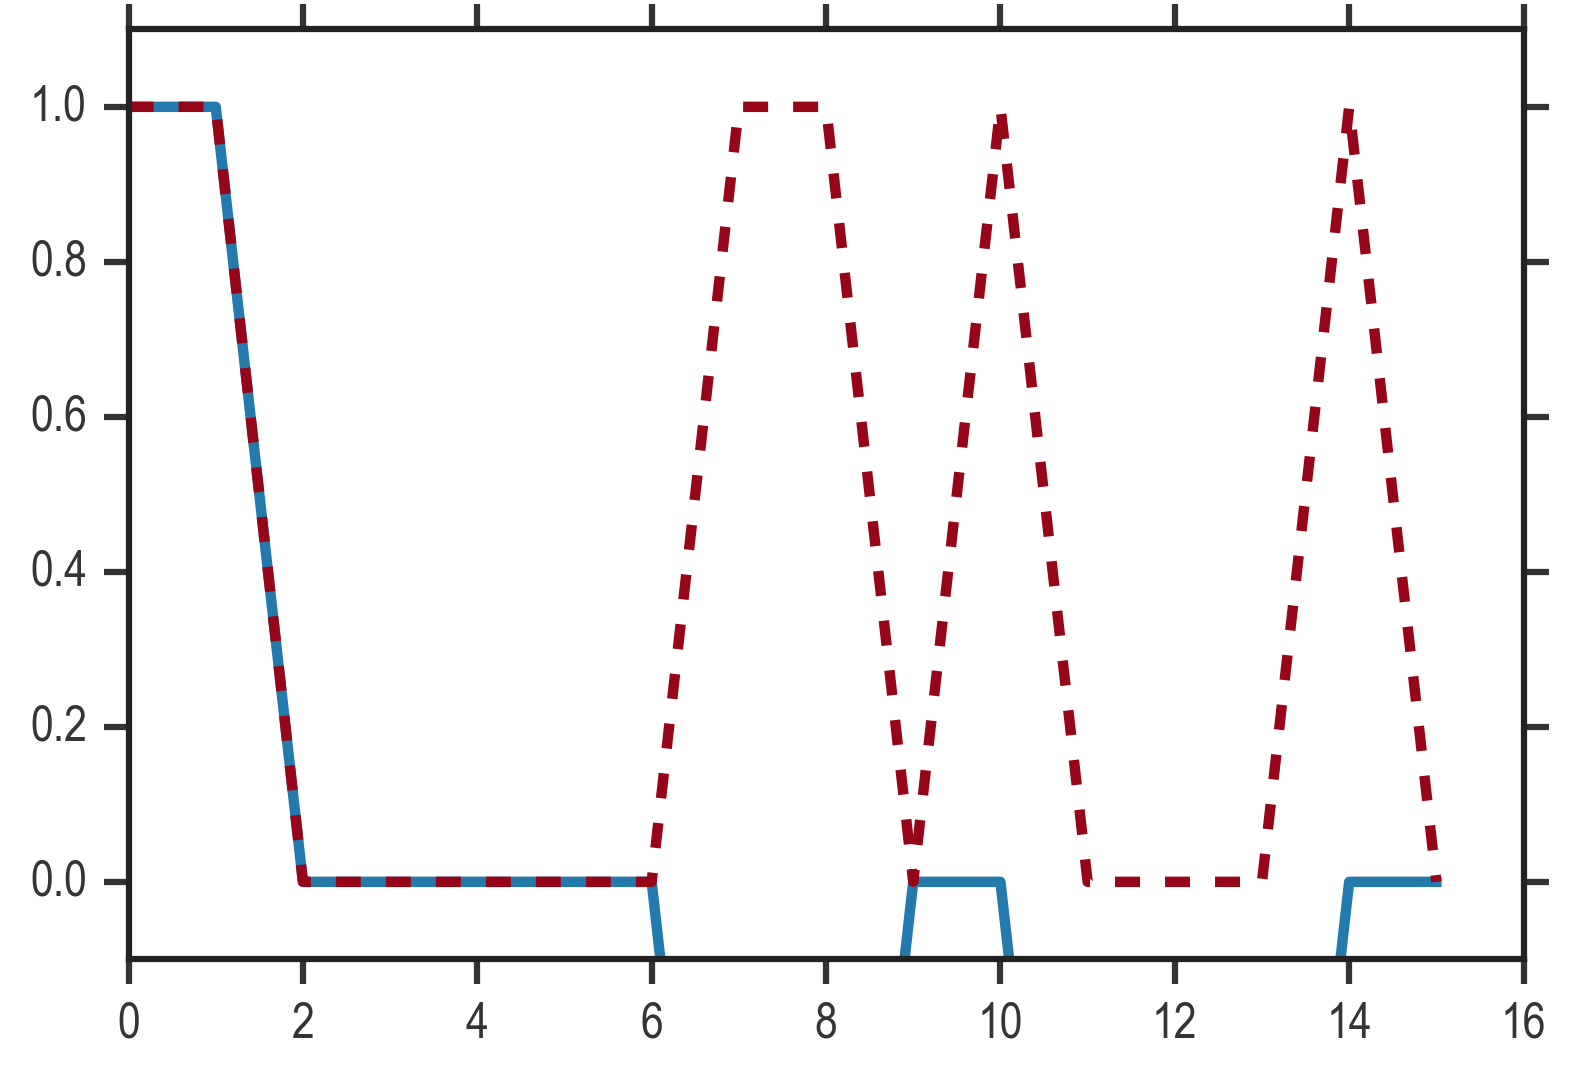

In [193]:
plt.plot(example_c)
plt.plot(A_base[206,:], '--')
plt.ylim(-.1,1.1)

In [207]:
pa2.load_incomplete_entry()

array([ 1,  1,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0])

In [205]:
pa2.evaluate_incomplete_entry(pa2.NBClassifier)

  P(C=1|A_observed) = 0.9708


In [208]:
pa2.evaluate_incomplete_entry(pa2.TANBClassifier)

  P(C=1|A_observed) = 0.9899


In [210]:
pa2.main()

Naive Bayes
  10-fold cross validation total test accuracy 0.9181 on 232 examples
TANB Classifier
  10-fold cross validation total test accuracy 0.9526 on 232 examples
Naive Bayes Classifier on missing data
  P(C=1|A_observed) = 0.9708
TANB Classifier on missing data
  P(C=1|A_observed) = 0.9899


# (d)

In [233]:
pa2.evaluate(pa2.NBClassifier, train_subset=True)

(0.9137931034482759, 232)

In [234]:
pa2.evaluate(pa2.TANBClassifier, train_subset=True)

(0.8879310344827587, 232)